# Numerical Analysis - 7
###### Rafael Barsotti

#### 1) Implemente o algoritmo dado em sala para obter uma sequência de 1000 números pseudoaleatórios no interval [0, 1]. Plote o resultado obtido e compare com o gráfico obtido pra 1000 pontos uniformes gerados pelo python.

In [136]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

low = 0
high = 1
size = 1000
seed = 3

#Função Random do Python
def rand_py():
    x = np.random.uniform(low,high,size)
    sns.distplot(x, rug=True, rug_kws={"color": "b"}, kde_kws={"color": "k", "lw": 3, "label": "Python Random"},
                 hist_kws={"histtype": "step", "linewidth": 3,
                 "alpha": 1, "color": "b"})
    plt.show()
    
#Função Random da Aula
def rand_aula():
    li = seed
    x = []
    a  = 7**5
    b = (2**31)-1
    for i in range(size):
        li = a*li%b
        x.append(li/b)
    sns.distplot(x, rug=True, rug_kws={"color": "g"}, kde_kws={"color": "k", "lw": 3, "label": "Aula Random"},
                 hist_kws={"histtype": "step", "linewidth": 3,
                 "alpha": 1, "color": "g"})
    plt.show()

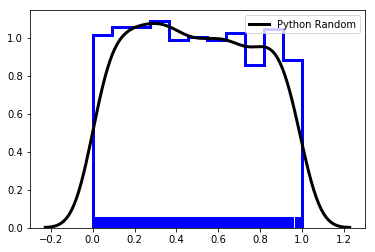

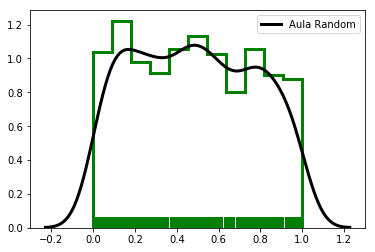

In [138]:
rand_py()
rand_aula()

#### 2a) Implementando o método da quadratura de Gauss com três nós, obtenha uma aproximação para $\int_{0}^{2}e^{x^2}$ .Estime o erro da aproximação e compare com o erro obtido usando a integral do polinômio interpolador de grau 2.


In [27]:
import math as m
import scipy.integrate as integrate
import scipy.special as special
from scipy.special import erf

def f(x):
    return m.e**(x**2)

def Quadratura_Gauss_3():
    g = 0
    x = [0.5+1/12*m.sqrt(10/3),0.5-1/12*m.sqrt(10/3),0.5+1/12*m.sqrt(10/3),0.5-1/12*m.sqrt(10/3)]
    y = [(1-m.sqrt(1/7*(3-4*m.sqrt(0.3)))),(1-m.sqrt(1/7*(3+4*m.sqrt(0.3)))),(1+m.sqrt(1/7*(3-4*m.sqrt(0.3)))),
         (1+m.sqrt(1/7*(3+4*m.sqrt(0.3))))]
    
    for i in range(4):
        g += m.e**-(y[i]**2) * x[i]
    return(g)

# ???
def Poli2():
    p2 = erf(2)*m.sqrt(m.pi)/2
    return(p2)

def Error_Gauss():
    a = Poli2()
    b = Quadratura_Gauss_3()
    e = abs(a-b)
    return e

e = Error_Gauss()

print('O Erro estimado da Quadratura de Gauss foi {}.'.format(e))

O Erro estimado da Quadratura de Gauss foi 0.00014770517018225515.


#### 2b) Implementando o MCMC obtenha uma aproximação para a integral do item anterior. Qual é o valor de $n$ necessário para obter o mesmo erro obtido pela regra de Simpson? Qual é o valorde $n$ necessário para obter o mesmo erro obtido pelo método de Gauss?

In [40]:
def MCMC_N_to_Gauss():
    int_real = Poli2()
    n = 1
    e_MCMC = 100
    while  > e:
        x = np.linspace(0, 2, n)
        y = f(x)
        a = y * 2/n 
        int_MCMC = sum(a)
        e_MCMC = abs(int_real - int_MCMC)
        n += 1
print('N de MCMC para error menor ou igual ao Gauss {}.'.format(e_MC))

MCMC_N_to_Gauss()

N de MCMC para error menor ou igual ao Gauss 925.


In [39]:
def MCMC_N_to_Simpson():
    n = 1
    e_MCMC = 100
    while erroMC2 > 0.13333333:
        x = np.linspace(0, 2, n)
        y = f(x)
        a = y * 2/n 
        int_MCMC = sum(a)
        e_MCMC = abs(int_real - int_MCMC)
        n += 1
print('N de MCMC para error menor ou igual ao Gauss {}.'.format(e_MC))

N de MCMC para error menor ou igual ao Simpson 5.
